In [184]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.featurizer import AtomPairsFeaturizer
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.cluster import KMedoids
from pyemma.coordinates import tica


In [185]:
import sys
sys.path.insert(0, '/Users/Bren/Documents/Github/observable-tica/tica-class')

from class_obs_tica import ObservableTicaObject
from class_plots import plot_all
from class_plots import plot_3d
from class_plots import plot_all_obs_cmap

In [186]:
from msmbuilder.example_datasets import AlanineDipeptide
trajs = AlanineDipeptide().get().trajectories

AD_topology = trajs[0].topology
# print([atom for atom in topology.atoms])
# print (bonds)

def get_adj_list(topology):
    table, bonds = topology.to_dataframe()

    neighbors = {}
    for bond in bonds:
        try:
            neighbors[bond[0]].append(bond[1])
        except:
            neighbors[bond[0]] = [bond[1]]
        try:
            neighbors[bond[1]].append(bond[0])
        except:
            neighbors[bond[1]] = [bond[0]]
    return neighbors

AD_neighbors = get_adj_list(AD_topology)

alanine_dipeptide already is cached


In [187]:
def recurse(quad, rtn, adj_list, visited = [False]*topology.n_atoms):
    visited[quad[-1]] = True
    if len(quad) == 4:
        return quad
    if len(quad)< 4:
        neigh = adj_list[quad[-1]]
        for n in neigh:
            visited_copy = visited[:]
            quad_copy = quad[:]
            if visited[n]== False:
                visited[n] == True
                quad_copy.append(n)
                a = (recurse(quad_copy, rtn, adj_list, visited))
                if a is not None:
                    rtn.append(a)

In [188]:
a = []
for atom in range(AD_topology.n_atoms):
    rtn = []
    visited = [False]*AD_topology.n_atoms
    recurse([atom], rtn, AD_neighbors, visited)
    a.extend(rtn)

In [189]:
for i in a:
    i.sort()

In [190]:
a = [tuple(l) for l in a]
a = set(a)
print(len(a))

41


In [191]:
X = [md.compute_dihedrals(traj, a) for traj in trajs]
print(len(X), len(X[0]), len(X[0][0]))
print(len(Y), len(Y[0]), len(Y[0][0]))

10 9999 41
10 9999 45


In [192]:
heavy_atom_ind_list = [[j.index for j in i.atoms if j.element.name!="hydrogen"] for i in topology.residues]
heavy_atoms = [atom for residue in heavy_atom_ind_list for atom in residue]

In [193]:
all_pairs = []
for i in range(len(heavy_atoms)):
    for j in range(i):
        all_pairs.append((heavy_atoms[i],heavy_atoms[j]))

In [194]:
Y = AtomPairsFeaturizer(all_pairs).fit_transform(trajs)

X dims:  (10, 9999, 41)
Y dims:  (10, 9999, 45)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(24, 24)
Performing SVD
Done.


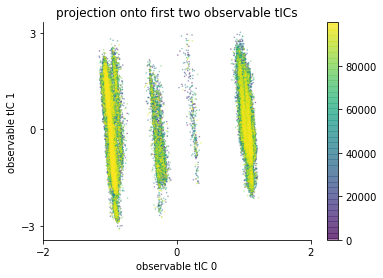

In [195]:
test = ObservableTicaObject()
tics = test.fit_transform(X,Y)
plot_all(tics[:,0], tics[:,1])

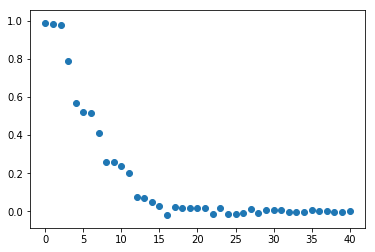

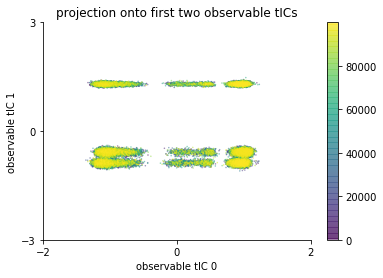

In [196]:
obj_x = tica(np.vstack(X), lag = 1, dim = 2)
plt.scatter(range(len(obj_x.eigenvalues)), obj_x.eigenvalues)
plt.show()
obj_x = np.array(obj_x.get_output()[0])
plot_all(obj_x[:,0], obj_x[:,1])

In [197]:
from msmbuilder.example_datasets import MetEnkephalin
print(type(MetEnkephalin))
trajs = MetEnkephalin().get().trajectories
ME_top = trajs[0].topology

X3 = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4']).fit_transform(trajs)
Y3 = ContactFeaturizer(contacts='all', scheme='ca').fit_transform(trajs)

<class 'type'>
met_enkephalin already is cached


In [199]:
all_torsion_quads = []
ME_neighbors = get_adj_list(ME_top)



for atom in range(ME_top.n_atoms):
    rtn = []
    visited = [False]*ME_top.n_atoms
    recurse([atom], rtn, ME_neighbors, visited)
    all_torsion_quads.extend(rtn)
    
X = [md.compute_dihedrals(traj, all_torsion_quads) for traj in trajs]
Y = DihedralFeaturizer().fit_transform(trajs)
    

X dims:  (10, 9992, 354)
Y dims:  (10, 9992, 16)
Fitting data to object pre-whitening
Whitening Data
Estimating Koopman Matrices
largest eigenval:  1.0
Solving Riccati
(107, 107)
Performing SVD
Done.


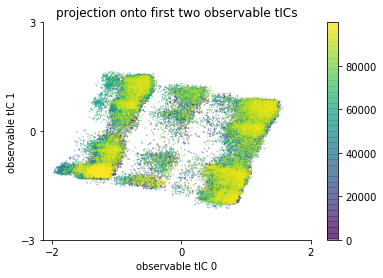

In [200]:
test2 = ObservableTicaObject()
tics = test2.fit_transform(X,Y)
plot_all(tics[:,0], tics[:,1])